In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('../data/mastery.csv')
n = pd.read_csv('../data/names.csv')

s = df.sum().sort_values()

In [3]:
vals = df.values.flatten()
print(f'Mean: {vals.mean():.3f}')
print(f'std: {vals.std():.3f}')

Mean: 0.053
std: 0.130


(array([8.61560026, 0.68426062, 0.27890922, 0.14083535, 0.08161002,
        0.05119193, 0.03443479, 0.02313783, 0.01728015, 0.07273982]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

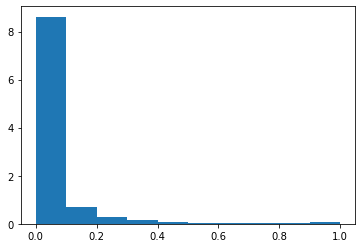

In [4]:
plt.hist(vals, density=True)

(array([411830.,  32708.,  13332.,   6732.,   3901.,   2447.,   1646.,
          1106.,    826.,   3477.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

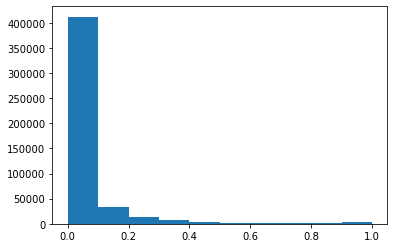

In [5]:
plt.hist(vals, density=False)

(array([32707., 13330.,  6732.,  3902.,  2446.,  1646.,  1106.,   826.,
         3477.]),
 array([0.10000122, 0.20000108, 0.30000095, 0.40000081, 0.50000068,
        0.60000054, 0.70000041, 0.80000027, 0.90000014, 1.        ]),
 <BarContainer object of 9 artists>)

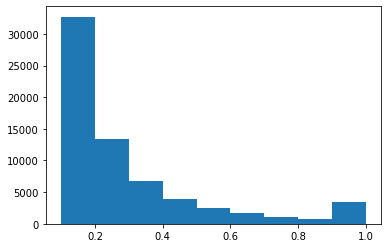

In [6]:
zeros_removed = vals[vals>0.1]
plt.hist(zeros_removed, bins=9) 

In [7]:
print('Sum of Mastery Scores - correlated with champion popularity')
print(s)

Sum of Mastery Scores - correlated with champion popularity
Milio       18.800868
Briar       21.022974
Naafiri     21.071618
Skarner     29.054571
Nilah       31.694343
              ...    
Lux        399.645698
Kaisa      406.180215
Jhin       422.863691
Ezreal     484.918426
Yasuo      500.765366
Length: 165, dtype: float64


## Check whether different champion players have different preferences

There is evidence that players who frequently play Yasuo play champions opposite of Lux, since Yasuo players have a much lower average mastery score on champions such as Lux, MissFortune, and Ashe while they play more Zed, Yone, and Akali on average. This makes sense from a gameplay point of view, since champions such as Zed, Yone, and Akali play the same lane as Yasuo (mid/top), and are also part of the Assassin class. Lux takes the mid/bottom lane role, however her play style is to support the team and provide long distance burst damage as opposed to Yasuo's riskier playstyle of assassinating the enemy's backline in melee range, putting himself at risk. Miss Fortune and Ashe are marksmen that are primarily played in the bottom lane role whose job it is to provide consistent long distance damage.

In [8]:
s = df.mean().sort_values()
yasuo = df.loc[(df['Yasuo']==1.00)]
yasuo = yasuo.mean().sort_values()
#yasuo = (yasuo-s).sort_values()
lux = df.loc[(df['Lux']==1.00)]
lux = lux.mean().sort_values()
#lux = (lux-s).sort_values()
print('Top 10 Average Mastery Scores of Sampled Players')
print(s.tail(10))
print('Average 10 Average Mastery Scores of Lux Players')
print(lux.tail(10))
print('Top 10 Average Mastery Scores of Yasuo Players')
print(yasuo.tail(10))

Top 10 Average Mastery Scores of Sampled Players
Vayne          0.106383
Akali          0.112517
MissFortune    0.113991
Ashe           0.117454
Caitlyn        0.133999
Lux            0.137952
Kaisa          0.140207
Jhin           0.145966
Ezreal         0.167386
Yasuo          0.172857
dtype: float64
Average 10 Average Mastery Scores of Lux Players
Yuumi          0.117612
Ashe           0.134757
Caitlyn        0.135078
Seraphine      0.150604
Senna          0.153759
MissFortune    0.162055
Soraka         0.178314
Ahri           0.190625
Morgana        0.261734
Lux            1.000000
dtype: float64
Top 10 Average Mastery Scores of Yasuo Players
Jhin        0.121506
MasterYi    0.121731
Katarina    0.127977
Irelia      0.132969
LeeSin      0.145234
Akali       0.149230
Ezreal      0.151760
Yone        0.180306
Zed         0.197347
Yasuo       1.000000
dtype: float64


In [14]:
s = df.mean().sort_values()
yasuo = df.loc[(df['Yasuo']==1.00)]
yasuo = yasuo.mean().sort_values()
yasuo = (yasuo-s).sort_values()
lux = df.loc[(df['Lux']==1.00)]
lux = lux.mean().sort_values()
lux = (lux-s).sort_values()


print('Top 5 Champions (Popularity)')
print(s.tail(5))
print('Top 5 Champions More Popular With Lux Players')
print(lux.tail(5))
print('Top 5 Champions More Popular with Yasuo Players')
print(yasuo.tail(5))
print('Top 5 Champions Least Popular With Lux Players')
print(lux.head(5))
print('Top 5 Champions Least Popular With Yasuo Players')
print(yasuo.head(5))



Top 5 Champions (Popularity)
Lux       0.137952
Kaisa     0.140207
Jhin      0.145966
Ezreal    0.167386
Yasuo     0.172857
dtype: float64
Top 5 Champions More Popular With Lux Players
Ahri         0.103203
Seraphine    0.115301
Soraka       0.124106
Morgana      0.174043
Lux          0.862048
dtype: float64
Top 5 Champions More Popular with Yasuo Players
Katarina    0.047993
LeeSin      0.054233
Yone        0.095960
Zed         0.100005
Yasuo       0.827143
dtype: float64
Top 5 Champions Least Popular With Lux Players
Yasuo      -0.118227
Jhin       -0.079871
Kayn       -0.078089
Darius     -0.077237
# Aatrox   -0.070438
dtype: float64
Top 5 Champions Least Popular With Yasuo Players
Lux           -0.057667
MissFortune   -0.049844
Kaisa         -0.048781
Morgana       -0.040522
Yuumi         -0.036356
dtype: float64


array([[<AxesSubplot:title={'center':'Yasuo'}>,
        <AxesSubplot:title={'center':'Zed'}>],
       [<AxesSubplot:title={'center':'Lux'}>, <AxesSubplot:>]],
      dtype=object)

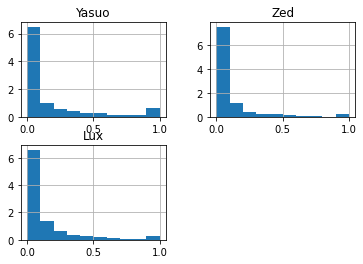

In [10]:
df.hist(column=['Yasuo', 'Zed', 'Lux'], density=True)

array([[<AxesSubplot:title={'center':'Zed'}>,
        <AxesSubplot:title={'center':'Lux'}>]], dtype=object)

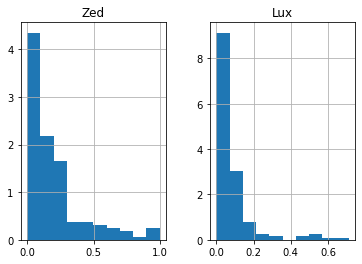

In [11]:
yasuo = df.loc[(df['Yasuo']==1.00)]
yasuo.hist(column=['Zed', 'Lux'], density=True)